In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [21]:
df_main = pd.read_csv('results/results.csv', converters = {
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

In [22]:
df_main.dtypes

run          object
type         object
module       object
name         object
attrname     object
attrvalue    object
vectime      object
vecvalue     object
dtype: object

In [23]:
df_main.name.unique()

array([nan, 'queueLength:vector', 'queueBitLength:vector',
       'transmissionState:vector', 'passedUpPk:vector(count)',
       'droppedPkWrongPort:vector(count)',
       'droppedPkBadChecksum:vector(count)', 'cnt:vector',
       'lastMaxWindow:vector', 'originalPoint:vector', 'bicK:vector',
       'tcpRcvQueueBytes:vector', 'rcvAdv:vector', 'rcvWnd:vector',
       'sndAck:vector', 'bufferedPackets', 'incomingPacketLengths:vector',
       'queueingTime:vector', 'outgoingPacketLengths:vector',
       'txPk:vector(packetBytes)', 'rxPkOk:vector(packetBytes)',
       'passedUpPk:vector(packetBytes)', 'rcvSeq:vector', 'rcvAck:vector',
       'tcpRcvPayloadBytes:vector', 'sndWnd:vector',
       'rexmitQueueSize:vector', 'packetSent:vector(packetBytes)',
       'sndNxt:vector', 'unacked:vector', 'rtt:vector', 'srtt:vector',
       'rttvar:vector', 'rto:vector', 'dupAcks:vector',
       'packetReceived:vector(packetBytes)', 'endToEndDelay:vector',
       'orca_cnt:vector', 'cwnd:vector', 'sst

In [24]:
df_main[df_main.name == 'cnt:vector'].head()

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
47,General-0-20240728-17:58:22-508581,vector,OrcaNet.srv[0].tcp.conn-1,cnt:vector,NaN,NaN,[0.0],[0.0]
51,General-0-20240728-17:58:22-508581,vector,OrcaNet.cli[0].tcp.conn-8,cnt:vector,NaN,NaN,"[0.0, 0.261832701608, 0.264644076608, 0.291028...","[0.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0..."
81,General-0-20240728-17:58:22-508581,vector,OrcaNet.srv[0].tcp.conn-9,cnt:vector,NaN,NaN,[0.016008476072],[0.0]


In [25]:
vec = df_main[df_main.name == 'dupacks:vector'] #.iloc[1]  # take some vector
vec2 = df_main[df_main.name == 'orca_cnt:vector'] #.iloc[1]  # take some vector

plt.figure()

plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post',label='dupAcks')
plt.plot(vec2.vectime.iloc[0], vec2.vecvalue.iloc[0], drawstyle='steps-post',label='orca_cnt')

plt.legend()

plt.title('ssthresh and cwnd')
plt.xlabel('simtime')
plt.ylabel('value')
# plt.xlim(0,100)
plt.show()

IndexError: single positional indexer is out-of-bounds

<Figure size 640x480 with 0 Axes>

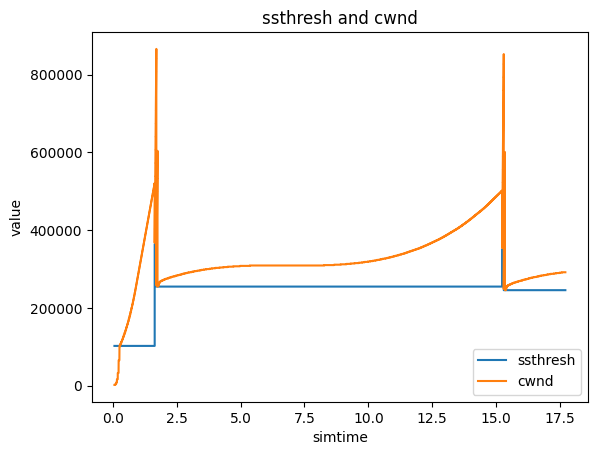

In [26]:
vec = df_main[df_main.name == 'ssthresh:vector'] #.iloc[1]  # take some vector
vec2 = df_main[df_main.name == 'cwnd:vector'] #.iloc[1]  # take some vector

plt.figure()

plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post',label='ssthresh')
plt.plot(vec2.vectime.iloc[0], vec2.vecvalue.iloc[0], drawstyle='steps-post',label='cwnd')

plt.legend()

plt.title('ssthresh and cwnd')
plt.xlabel('simtime')
plt.ylabel('value')
# plt.xlim(0,100)
plt.show()

In [28]:
df_main[df_main.name == 'rtt:vector'].head()

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
120,General-0-20240728-17:58:22-508581,vector,OrcaNet.srv[0].tcp.conn-9,rtt:vector,NaN,NaN,[0.048024328088],[0.048]
131,General-0-20240728-17:58:22-508581,vector,OrcaNet.cli[0].tcp.conn-8,rtt:vector,NaN,NaN,"[0.064165587128, 0.096306856208, 0.09644073120...","[0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.0..."


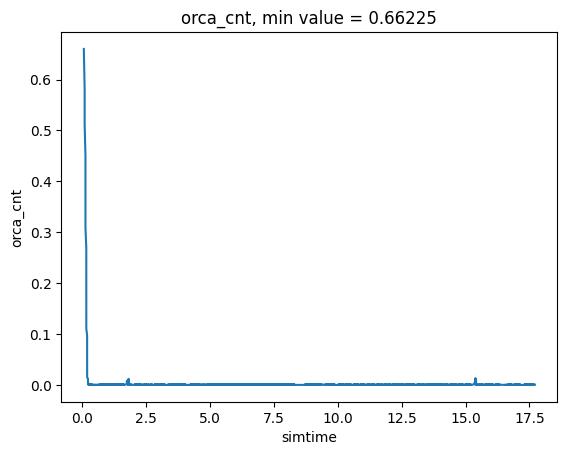

In [34]:
vec = df_main[df_main.name == 'rttvar:vector'] #.iloc[1]  # take some vector
plt.plot(vec.vectime.iloc[1], vec.vecvalue.iloc[1]) #, drawstyle='steps-post')

plt.title('orca_cnt, min value = ' + str(min(vec.vecvalue.iloc[0])))
plt.xlabel('simtime')
plt.ylabel('orca_cnt')
# plt.xlim(0,100)
plt.show()

In [49]:
print(min(vec.vecvalue.iloc[0]))

1.0


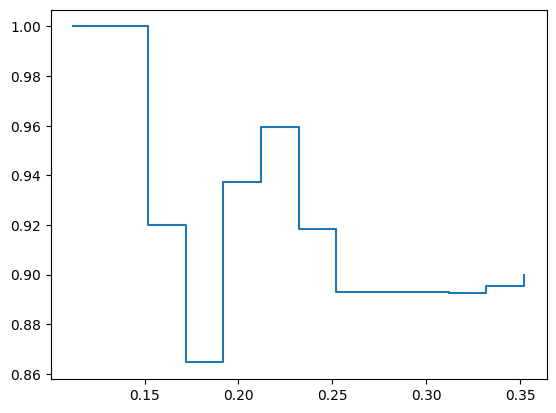

In [84]:
vec = df_main[df_main.name == 'feature7:vector'] #.iloc[1]  # take some vector
plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# plt.xlim(0,100)
plt.show()

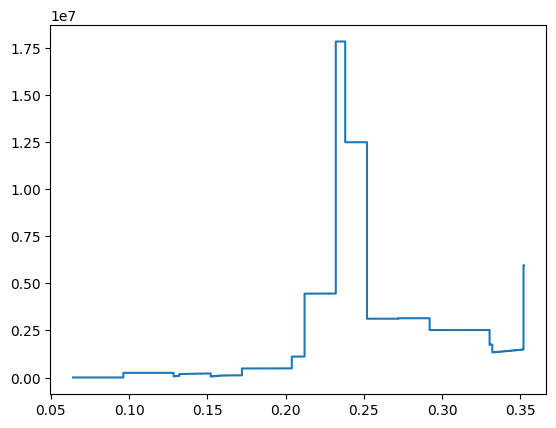

In [85]:
vec = df_main[df_main.name == 'cwnd:vector'] #.iloc[1]  # take some vector
plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# plt.xlim(0,100)
plt.show()

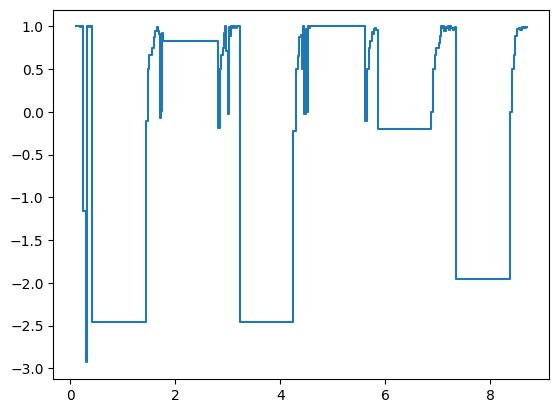

In [40]:
vec = df_main[df_main.name == 'reward:vector'] #.iloc[1]  # take some vector
plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# plt.xlim(0,100)
plt.show()

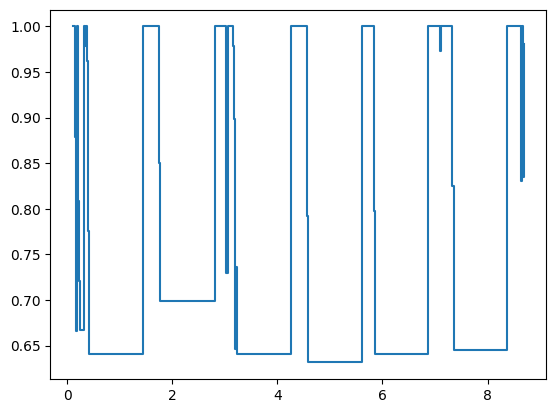

In [44]:
vec = df_main[df_main.name == 'feature7:vector'] #.iloc[1]  # take some vector
plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# plt.xlim(0,100)
plt.show()

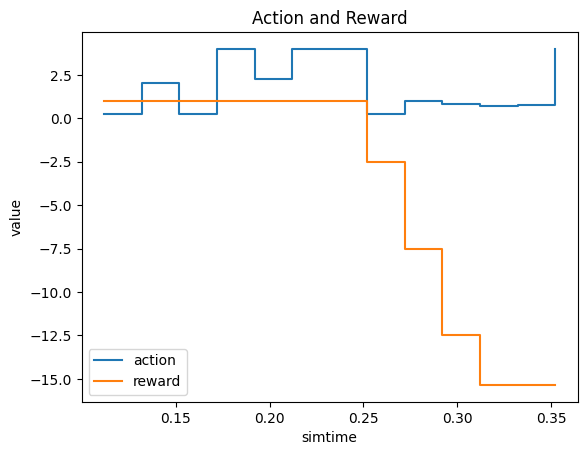

In [86]:
vec = df_main[df_main.name == 'action:vector'] #.iloc[1]  # take some vector
vec2 = df_main[df_main.name == 'reward:vector'] #.iloc[1]  # take some vector

plt.figure()

plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], label='action', drawstyle='steps-post')
plt.plot(vec.vectime.iloc[0], vec2.vecvalue.iloc[0], label='reward', drawstyle='steps-post')

# Add title and labels
plt.title('Action and Reward')
plt.xlabel('simtime')
plt.ylabel('value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# # plt.xlim(0,100)
# plt.show()

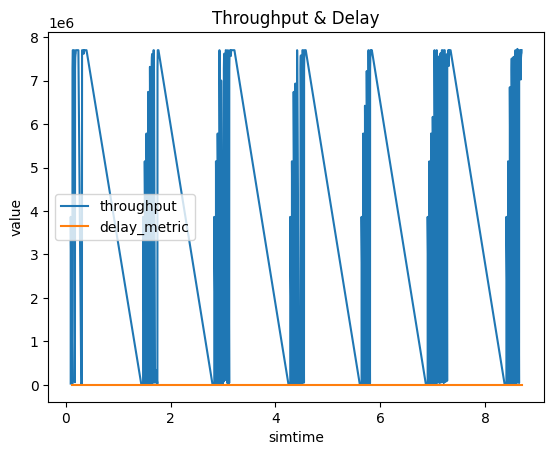

In [43]:
vec = df_main[df_main.name == 'avg_thr:vector'] #.iloc[1]  # take some vector
vec2 = df_main[df_main.name == 'feature7:vector'] #.iloc[1]  # take some vector
# vec3 = df_main[df_main.name == 'cwnd:vector'] #.iloc[1]  # take some vector

plt.figure()

plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], label='throughput')
plt.plot(vec2.vectime.iloc[0], vec2.vecvalue.iloc[0], label='delay_metric')
# plt.plot(vec3.vectime.iloc[0], vec3.vecvalue.iloc[0], label='cwnd')

# Add title and labels
plt.title('Throughput & Delay')
plt.xlabel('simtime')
plt.ylabel('value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(vec.vectime.iloc[0], vec.vecvalue.iloc[0], drawstyle='steps-post')
# # plt.xlim(0,100)
# plt.show()

In [5]:
df_cwnd = df[df["name"] == "cwnd:vector"]
df_cwnd.head()

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
133,General-0-20240713-17:18:27-17590,vector,OrcaNet.cli[0].tcp.conn-8,cwnd:vector,NaN,NaN,0.064165387128 0.096306655208 0.096440530208 0...,2048 247808 247808 1734656 1734656 1734656 173...
